<a href="https://www.kaggle.com/osamaneamah/notebook0a486f47c9?scriptVersionId=90026771" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/-current-available-disney-projects/disney_plus_projects.csv


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly as plot
import plotly.express as xp

In [3]:
data = pd.read_csv('../input/-current-available-disney-projects/disney_plus_projects.csv')

In [4]:
data.head()

,title,year,certificate,runtime_min,genre,rating,votes,director_star
0,The King's Man,2021,R,131,"Action, Adventure, Thriller",6.4,90344,Matthew Vaughn
1,West Side Story,2021,PG-13,156,"Crime, Drama, Musical",7.5,46778,Steven Spielberg
2,The Walking Dead,2010–2022,TV-14,44,"Drama, Horror, Thriller",8.3,934972,Andrew Lincoln
3,Free Guy,2021,PG-13,115,"Action, Adventure, Comedy",7.2,303127,Shawn Levy
4,Pam & Tommy,2022,TV-MA,340,"Biography, Drama, Romance",7.4,16576,Lily James


In [5]:
data.tail()

,title,year,certificate,runtime_min,genre,rating,votes,director_star
7845,Rapunzel's Tangled Adventure,2020,TV-Y7,21,"Animation, Action, Adventure",8.0,203,Joe Oh
7846,Rapunzel's Tangled Adventure,2020–2021,TV-Y7,21,"Animation, Action, Adventure",6.8,210,Tom Caulfield
7847,Miraculous: Tales of Ladybug & Cat Noir,2020,TV-G,22,"Animation, Action, Adventure",7.3,350,Thomas Astruc
7848,Miraculous: Tales of Ladybug & Cat Noir,2020–2021,No data,0,"Animation, Action, Adventure",0.0,0,Cristina Valenzuela
7849,Star Wars Resistance,2020,No data,0,"Animation, Action, Adventure",0.0,0,Justin Ridge


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7850 entries, 0 to 7849
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          7850 non-null   object 
 1   year           7703 non-null   object 
 2   certificate    7850 non-null   object 
 3   runtime_min    7850 non-null   int64  
 4   genre          7850 non-null   object 
 5   rating         7850 non-null   float64
 6   votes          7850 non-null   int64  
 7   director_star  7850 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 490.8+ KB


In [7]:
data.describe(include = 'all')

,title,year,certificate,runtime_min,genre,rating,votes,director_star
count,7850,7703,7850,7850.000000,7850,7850.000000,7.850000e+03,7850
unique,2080,401,17,NaN,304,NaN,NaN,2192
top,The Simpsons,1989–,TV-PG,NaN,"Animation, Action, Adventure",NaN,NaN,Mike B. Anderson
freq,705,373,2271,NaN,1123,NaN,NaN,282
mean,NaN,NaN,NaN,33.870573,NaN,6.882306,1.814794e+04,NaN
std,NaN,NaN,NaN,35.732016,NaN,2.165720,9.318353e+04,NaN
min,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000e+00,NaN
25%,NaN,NaN,NaN,21.000000,NaN,6.700000,5.100000e+01,NaN
50%,NaN,NaN,NaN,23.000000,NaN,7.500000,2.530000e+02,NaN
75%,NaN,NaN,NaN,40.000000,NaN,8.000000,2.065750e+03,NaN


In [8]:
data.isnull().sum()

title              0
year             147
certificate        0
runtime_min        0
genre              0
rating             0
votes              0
director_star      0
dtype: int64

# **Top 10 According to votes**

In [9]:
votes  = data.nlargest(columns=['votes'],n=10)
votes.head(10)

,title,year,certificate,runtime_min,genre,rating,votes,director_star
58,Fight Club,1999,R,139,Drama,8.8,2013180,David Fincher
118,The Avengers,2012,PG-13,143,"Action, Adventure, Sci-Fi",8.1,1343154,Joss Whedon
84,Atlanta,2016–,PG,116,"Comedy, Drama, Music",8.6,1310378,Donald Glover
87,Guardians of the Galaxy,2014,PG-13,32,"Action, Adventure, Comedy",8.5,1282231,James Gunn
182,Alias,2001–2006,TV-14,135,"Action, Drama, Mystery",8.7,1238917,Jennifer Garner
79,The Golden Girls,1985–1992,PG-13,117,"Comedy, Drama",7.9,1183230,Bea Arthur
86,MASH,1970,PG-13,130,"Comedy, Drama, War",8.1,1128641,Robert Altman
62,Scrubs,2001–2010,PG-13,194,"Comedy, Drama",7.9,1124330,Zach Braff
251,WALL·E,2008,G,98,"Animation, Adventure, Family",8.4,1073389,Andrew Stanton
97,The Princess Bride,1987,PG-13,44,"Adventure, Family, Fantasy",8.1,1066788,Rob Reiner


In [35]:
xp.scatter(votes,x='title',y='votes',hover_name='title',hover_data=['director_star','runtime_min','genre','certificate','year'],size='votes',size_max=20,
           title='Top 10 Votes')

# **Top 10 according to rating**

In [10]:
rating = data.nlargest(columns=['rating'],n=10)
rating.head(10)

,title,year,certificate,runtime_min,genre,rating,votes,director_star
5066,Amphibia,2009–2011,TV-Y7,45,"Animation, Short, Action",9.9,666,Kyler Spears
4856,The Mandalorian,2007–2015,TV-14,44,"Action, Adventure, Fantasy",9.8,52226,Rick Famuyiwa
6978,Gravity Falls,1989–,TV-Y7,23,"Animation, Action, Adventure",9.8,5068,Stephen Sandoval
7114,Gravity Falls,2014–2018,TV-Y7,22,"Animation, Action, Adventure",9.8,4558,Stephen Sandoval
7144,Star Wars: Rebels,1989–,TV-Y7,22,"Animation, Action, Adventure",9.8,5057,Dave Filoni
7778,Star Wars: The Clone Wars,2016–,TV-PG,27,"Animation, Action, Adventure",9.8,12356,Dave Filoni
7779,Star Wars: The Clone Wars,2018,TV-PG,26,"Animation, Action, Adventure",9.8,11298,Dave Filoni
7780,Star Wars: The Clone Wars,2021,TV-PG,23,"Animation, Action, Adventure",9.8,12461,Dave Filoni
226,Bluey,2018–,TV-Y,7,"Animation, Family",9.7,6075,David McCormack
2309,Buffy the Vampire Slayer,2002,TV-PG,43,"Action, Drama, Fantasy",9.7,7173,Joss Whedon


In [34]:
xp.scatter(rating,x='title',y='rating',hover_name='title',hover_data=['director_star','votes','genre','certificate','year'],size='rating',size_max=10,
          title='Top 10 Ratings')

# **Top 10 according to movies length**

In [11]:
runtime_min = data.nlargest(columns=['runtime_min'],n=10)
runtime_min.head(10)

,title,year,certificate,runtime_min,genre,rating,votes,director_star
490,Alice in Wonderland,1951,PG-13,557,"Animation, Adventure, Comedy",9.3,118686,Clyde Geronimi
19,The Mandalorian,2019–,TV-MA,492,"Action, Adventure, Fantasy",8.2,156900,Pedro Pascal
262,The Beatles: Get Back,2021,PG-13,468,"Documentary, Biography, Music",9.1,18233,The Beatles
980,Anita,2021,TV-G,467,"Biography, Drama, History",7.2,11838,Lok Man Leung
588,James and the Giant Peach,1996,TV-MA,458,"Animation, Adventure, Family",6.7,17924,Henry Selick
1030,The Little Mermaid,1992–1994,G,430,"Animation, Short, Adventure",5.7,5065,Jodi Benson
280,A Bug's Life,1998,TV-MA,409,"Animation, Adventure, Comedy",7.7,35486,John Lasseter
732,Strange Magic,2015,PG,406,"Animation, Adventure, Comedy",5.8,10966,Gary Rydstrom
1652,Wild Russia,2008–,TV-PG,360,Documentary,8.3,626,Christian Brückner
76,Gone Girl,2014,PG-13,350,"Drama, Mystery, Thriller",7.4,213784,David Fincher


In [26]:
xp.scatter(runtime_min,x='title',y='runtime_min',hover_name='title',hover_data=['director_star','votes','genre','certificate','year'],size='rating',size_max=10)

In [12]:
directors = data.director_star.value_counts().nlargest(11)
directors = pd.DataFrame(directors)
directors.reset_index(inplace=True)
directors = directors.rename({'index': 'Name','director_star':'Apperance'}, axis=1)  # new method
directors = directors[directors.Name!='No data']
directors.head(10)

,Name,Apperance
0,Mike B. Anderson,282
1,Pamela Fryman,196
2,Jim Reardon,184
4,Terry Hughes,108
5,Michael Lembeck,100
6,David Silverman,75
7,Peter Harris,72
8,Eric Dean Seaton,66
9,Dave Filoni,66
10,Mike Fallows,65


In [20]:
xp.bar(directors,x=directors.Name,y=directors.Apperance,title="Top 10 Directors")

In [13]:
genres = data.genre.value_counts().nlargest(11)
genres = pd.DataFrame(genres)
genres.reset_index(inplace=True)
genres = genres.rename({'index': 'Genre','genre':'Count'}, axis=1)  # new method
genres.head(10)

,Genre,Count
0,"Animation, Action, Adventure",1123
1,"Animation, Comedy",717
2,"Comedy, Drama, Family",691
3,"Comedy, Romance",391
4,"Comedy, Family",383
5,"Animation, Adventure, Comedy",349
6,Documentary,265
7,"Comedy, Drama",231
8,"Animation, Comedy, Family",209
9,Comedy,197


In [21]:
xp.bar(genres,x=genres.Genre,y=genres.Count, title="Top 10 Genres")

<AxesSubplot:>

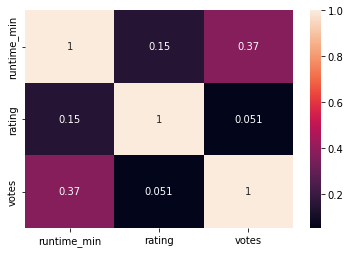

In [14]:
corr = data.corr()
sns.heatmap(corr, annot=True)